<a href="https://colab.research.google.com/github/21Ovi/TensorFlow_/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to REgressuib with Neural Network in TensorFlow

There are many definations for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

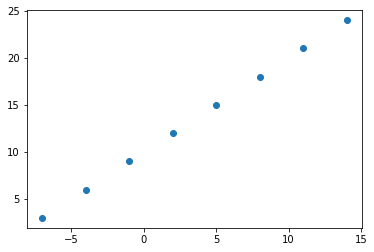

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulaize ot
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
X[1], y[1]

(-4.0, 6.0)

In [14]:
X[0].ndim

0

In [ ]:
X